# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kone
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | vrangel'
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | luba
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | alotau
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | paracuru
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | rio grande
Processing Record 19 of Set 1 | ahau
City not found. Skipping...
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | pacific grove
Processing Record 2

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,284.22,60,93,1.34,AU,1727217825
1,adamstown,-25.0660,-130.1015,292.72,70,86,6.63,PN,1727217826
2,kone,-21.0595,164.8658,302.19,41,1,2.89,NC,1727217828
3,iqaluit,63.7506,-68.5145,279.00,86,75,3.09,CA,1727217829
4,waitangi,-43.9535,-176.5597,281.94,78,16,6.26,NZ,1727217830


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,284.22,60,93,1.34,AU,1727217825
1,adamstown,-25.0660,-130.1015,292.72,70,86,6.63,PN,1727217826
2,kone,-21.0595,164.8658,302.19,41,1,2.89,NC,1727217828
3,iqaluit,63.7506,-68.5145,279.00,86,75,3.09,CA,1727217829
4,waitangi,-43.9535,-176.5597,281.94,78,16,6.26,NZ,1727217830


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

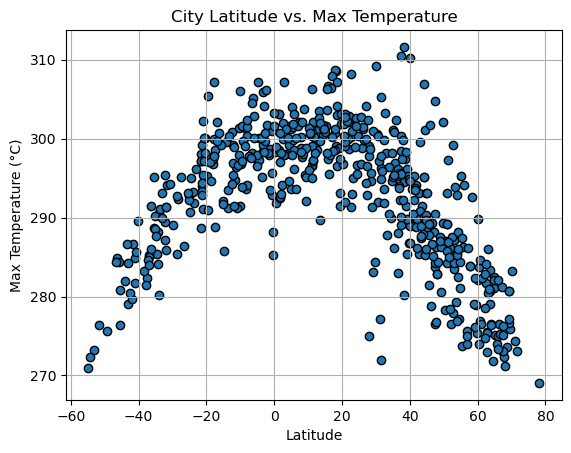

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

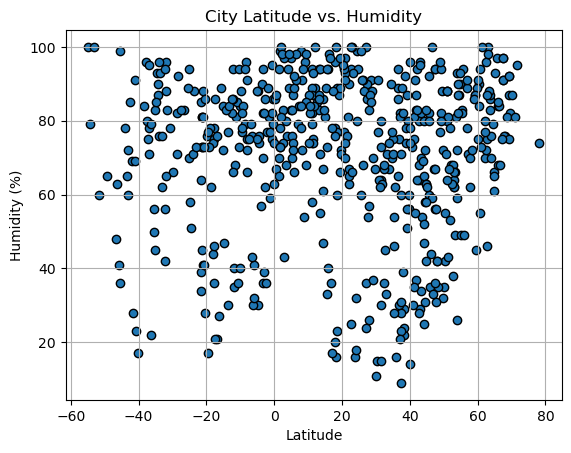

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

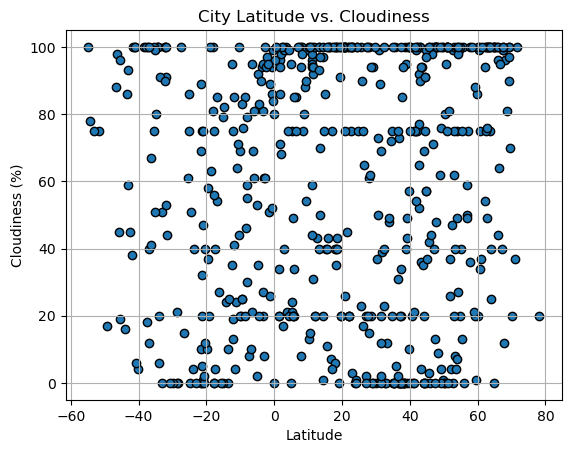

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

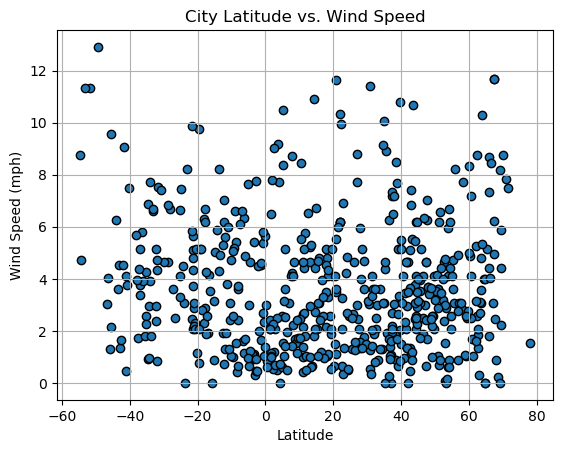

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept 
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")      

    plt.savefig(save_path) 
    return rvalue**2

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,iqaluit,63.7506,-68.5145,279.00,86,75,3.09,CA,1727217829
5,vrangel',42.7297,133.0839,289.35,80,92,5.09,RU,1727217831
7,luba,3.4568,8.5547,298.10,80,100,0.49,GQ,1727217834
9,ribeira grande,38.5167,-28.7000,297.47,92,100,8.49,PT,1727217836
12,yellowknife,62.4560,-114.3525,281.71,96,100,2.57,CA,1727217840


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,284.22,60,93,1.34,AU,1727217825
1,adamstown,-25.0660,-130.1015,292.72,70,86,6.63,PN,1727217826
2,kone,-21.0595,164.8658,302.19,41,1,2.89,NC,1727217828
4,waitangi,-43.9535,-176.5597,281.94,78,16,6.26,NZ,1727217830
6,west island,-12.1568,96.8225,299.14,94,75,6.17,CC,1727217832


###  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere R-squared: 0.60


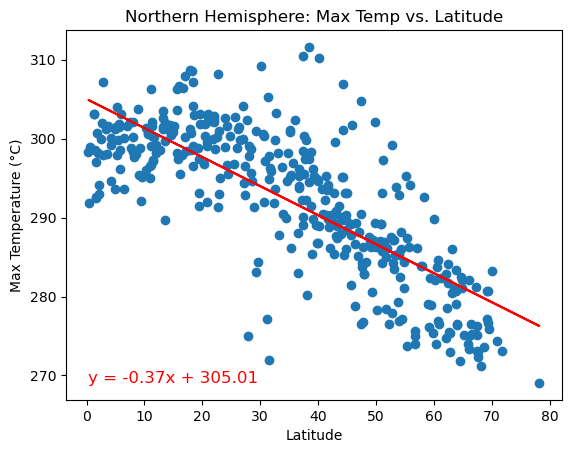

In [65]:
# Linear regression on Northern Hemisphere
northern_hemisphere_r_squared = plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Northern Hemisphere: Max Temp vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\NH_MaxTemp_vs_Lat.png"  
)

print(f"Northern Hemisphere R-squared: {northern_hemisphere_r_squared:.2f}")

Southern Hemisphere R-squared: 0.65


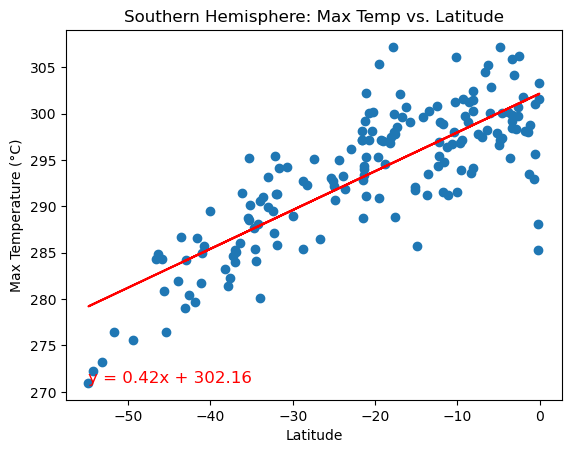

In [67]:
# Linear regression on Southern Hemisphere
southern_hemisphere_r_squared = plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Southern Hemisphere: Max Temp vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\SH_MaxTemp_vs_Lat.png"  
)

print(f"Southern Hemisphere R-squared: {southern_hemisphere_r_squared:.2f}")

**Discussion about the linear relationship:** There is strong correlation between lattitude and temperature. The further from the equator we go, the colder it tends to be.

### Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere Humidity R-squared: 0.00


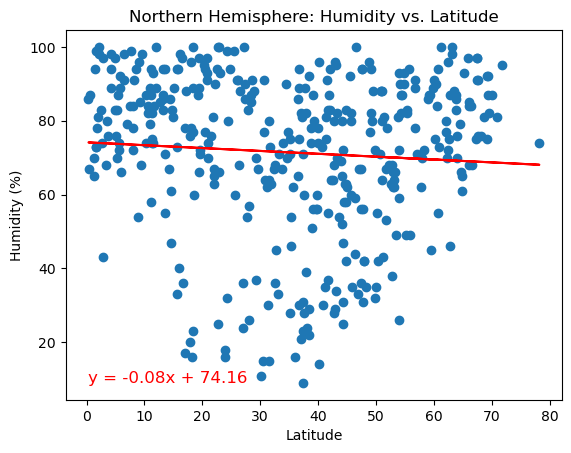

In [69]:
# Northern Hemisphere
northern_hemisphere_humidity_r_squared = plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Northern Hemisphere: Humidity vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\NH_Humidity_vs_Lat.png"  
)

print(f"Northern Hemisphere Humidity R-squared: {northern_hemisphere_humidity_r_squared:.2f}")

Southern Hemisphere Humidity R-squared: 0.00


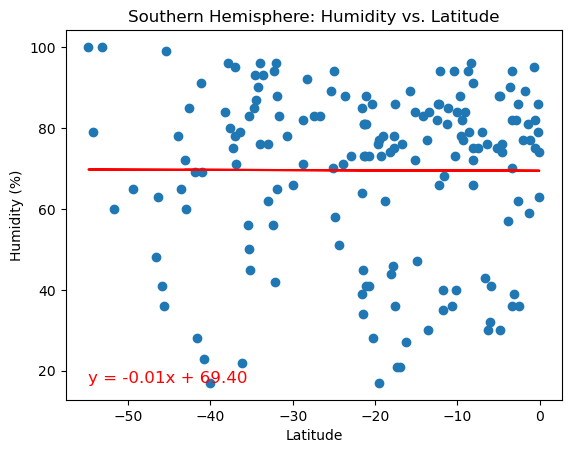

In [71]:
# Southern Hemisphere
southern_hemisphere_humidity_r_squared = plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Southern Hemisphere: Humidity vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\SH_Humidity_vs_Lat.png"  
)

print(f"Southern Hemisphere Humidity R-squared: {southern_hemisphere_humidity_r_squared:.2f}")

**Discussion about the linear relationship:** There appears to be no correlation between humidity and latitude 

### Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere Cloudiness R-squared: 0.00


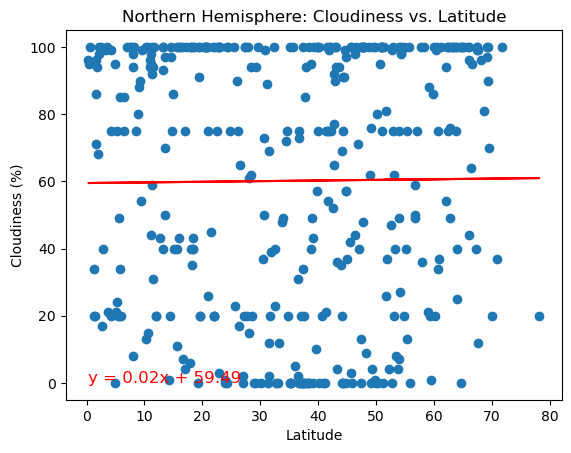

In [73]:
# Northern Hemisphere
northern_hemisphere_cloudiness_r_squared = plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Northern Hemisphere: Cloudiness vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\NH_Cloudiness_vs_Lat.png" 
)

print(f"Northern Hemisphere Cloudiness R-squared: {northern_hemisphere_cloudiness_r_squared:.2f}")

Southern Hemisphere Cloudiness R-squared: 0.01


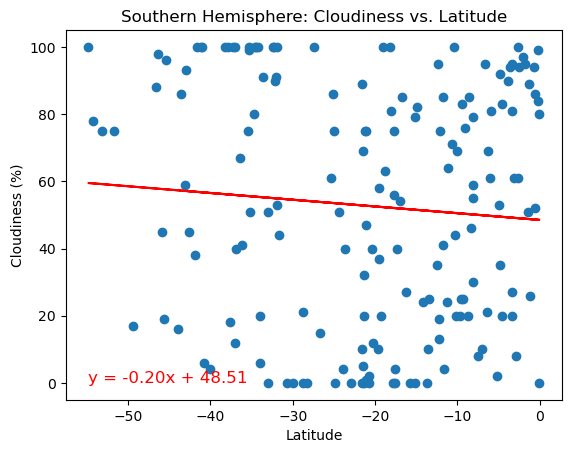

In [75]:
# Southern Hemisphere
southern_hemisphere_cloudiness_r_squared = plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Southern Hemisphere: Cloudiness vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\SH_Cloudiness_vs_Lat.png"  
)

print(f"Southern Hemisphere Cloudiness R-squared: {southern_hemisphere_cloudiness_r_squared:.2f}")

**Discussion about the linear relationship:** There appears to be little to no correlation between Cloudiness and latitude 

### Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere Wind Speed R-squared: 0.01


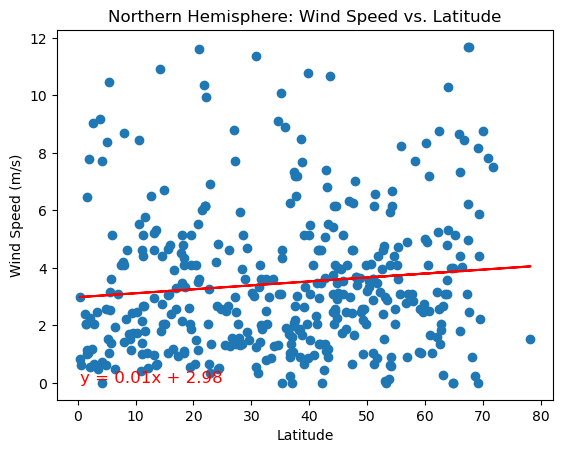

In [77]:
# Northern Hemisphere
northern_hemisphere_wind_speed_r_squared = plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Northern Hemisphere: Wind Speed vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\NH_WindSpeed_vs_Lat.png"  
)

print(f"Northern Hemisphere Wind Speed R-squared: {northern_hemisphere_wind_speed_r_squared:.2f}")

Southern Hemisphere Wind Speed R-squared: 0.10


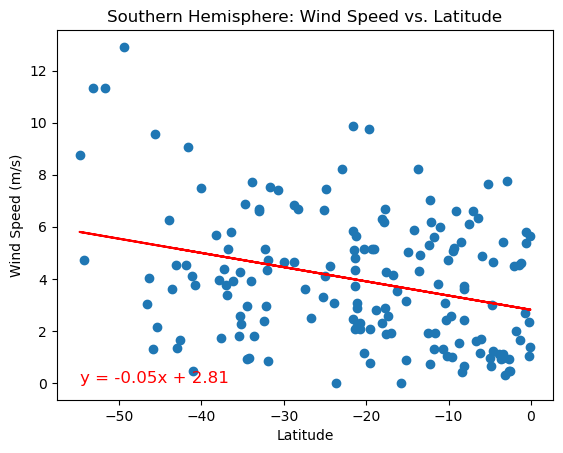

In [81]:
# Southern Hemisphere
southern_hemisphere_wind_speed_r_squared = plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Southern Hemisphere: Wind Speed vs. Latitude",  
    r"C:\Users\DonJa\Documents\Module 6 Challenge\Starter_Code\output_data\SH_WindSpeed_vs_Lat.png"  
)

print(f"Southern Hemisphere Wind Speed R-squared: {southern_hemisphere_wind_speed_r_squared:.2f}")

**Discussion about the linear relationship:** There appears to be little to no correlation between wind speed and Latitude 